In [5]:
import twint

In [6]:
import gc
gc.collect()

34

In [7]:
import nest_asyncio
nest_asyncio.apply()

In [ ]:
def get_followers_following(username):
    dic={}
    c = twint.Config()
    c.Username = username
    c.Hide_output = True
    c.Store_object = True
    sonuc= twint.run.Lookup(c)

    fol = twint.output.users_list[:]
    dic["followers"] = fol[0].followers
    dic["following"] = fol[0].following
    return dic

In [ ]:
tweets=[]
c = twint.Config()
c.Username = 'DiyanetTV'
c.Since = "2019-3-3"
c.Limit = 5000
c.Store_object = True
c.Store_csv = True
c.Output = "DiyanetTV.csv"
twint.run.Search(c)
tweets = twint.output.tweets_list

In [9]:
print(len(tweets))

5000


In [10]:
import io
hashtags={}
#print(type(tweets), len(tweets), type(hashtags))
# first iterate over the tweets
for t in tweets:
    #print('t:', t, type(t), t.hashtags, type(t.hashtags))
    # then iterate over the hashtags of that single tweet
    for h in t.hashtags:
        # increment the count if the hashtag already exists, otherwise initialize it to 1
        #print('h:',h,type(h),t.username)
        if(t.username in hashtags):
            if(h in hashtags[t.username]):
                hashtags[t.username][h] += 1
            else:
                hashtags[t.username][h]=1
        else:
            hashtags[t.username]={h:1}

# now save the data
with io.open('hashtags.csv', 'w', encoding="utf-8") as output:
    output.write('username,hashtag,count\n')
    for user in hashtags:
        for h in hashtags[user]:
            output.write('{},{},{}\n'.format(user, h, hashtags[user][h]))

In [ ]:
from collections import Counter

replies = twint.Config()
replies.Since = "2018-03-01"
replies.Pandas = True
replies.To = "@DiyanetTV"
twint.run.Search(replies)
df = twint.storage.panda.Tweets_df
#print(df)

In [ ]:
#print(df.head())
df.to_csv('Replies.csv', index=False)  
Replies = {x:y for x,y in zip(df['conversation_id'],df['nreplies'])}
fetchedReplies =Counter(df['conversation_id'])
#print(df[df['conversation_id']=='1243481878402723840'])
for tweet in Replies:
    print(tweet, "\t{}\t{}\t".format(Replies[tweet],fetchedReplies[tweet]))

In [13]:
mentions={}
#print(tweets)
for t in tweets:
    #print('t:', t, type(t), t.hashtags, type(t.hashtags))
    # then iterate over the hashtags of that single tweet
    for m in t.mentions:
        #print(m, len(mentions))
        # increment the count if the hashtag already exists, otherwise initialize it to 1
        #print('h:',h,type(h),t.username)
        if(m['screen_name'] in mentions):
            mentions[m['screen_name']]+=1
        else:
            mentions[m['screen_name']]=1

print(mentions)

{'dibalierbas': 18, 'genclerindili': 1, 'yayindiyanet': 1, 'dr_fatihkurt': 24, 'diyanettv': 15, 'dibgenclik': 5, 'isliyendr': 4, 'diyanetvakfi': 2, 'diyanetradyo': 2, 'diyanethbr': 1, 'bnymnalbayrak': 2, 'diyanettvcocuk': 1, '1920yesilay': 1, 'yavuzselimkiran': 1, 'elifcyhn': 1, 'hatungltekin1': 1, 'dubailitalebe': 1, 'hseyini67648111': 1, 'diyanetcocuk': 1}


In [14]:
import pandas as pd 
mentions_df= pd.DataFrame(mentions.items(), columns=['screen_name', 'count'])
mentions_df.to_csv('mentions.csv', index=False)

In [16]:
import sys
print(sys.executable)

C:\Users\tuba.demir\AppData\Local\Programs\Python\Python39\python.exe


In [ ]:
df_tweet=pd.read_csv('DiyanetTV.csv')
print(df_tweet.columns)
print(df_tweet.describe())
df_tweet['tweet_date']=pd.to_datetime(df_tweet['date'] + ' ' + df_tweet['time'])

df_tweet = df_tweet.rename(columns={'tweet': 'Tweet', 'tweet_date': 'Timestamp', 'hashtags': 'Subject'})
print(df_tweet.head())                      


In [ ]:
def twint2pd(columns):
    return twint.output.panda.Tweets_df[columns]

In [23]:
tweet_df= df_tweet[['Timestamp','username','Tweet', 'Subject','mentions','replies_count','retweets_count','likes_count']]
print(tweet_df.head())

            Timestamp   username  \
0 2021-07-30 09:30:15  diyanettv   
1 2021-07-30 09:03:03  diyanettv   
2 2021-07-30 08:00:04  diyanettv   
3 2021-07-30 07:30:04  diyanettv   
4 2021-07-30 06:00:01  diyanettv   

                                               Tweet  \
0  🔹 Cuma bir andır. Huzurun ve sevincin gönüller...   
1  📌 Dini Konularda Aklımıza Takılan Sorular Ceva...   
2  📺 #DiyanetTV'de Bugün  📌 30 Temmuz 2021 Cuma  ...   
3  “Allah’ım! Bozgunculuktan, münafıklıktan ve kö...   
4  📍 Bir #Ayet, Bir #Hadis, Bir #Dua  (İşaret Dil...   

                                             Subject mentions  replies_count  \
0                                      ['diyanettv']       []              0   
1                     ['gününbereketi', 'diyanettv']       []              0   
2                   ['diyanettv', 'güvenlei̇zleyin']       []              0   
3                                     ['gününduası']       []              0   
4  ['ayet', 'hadis', 'dua', 'hayırlısabahlar',

In [25]:
tweet_list=tweet_df['Tweet'].tolist()

         date  likes_count
0  2021-07-30           12
1  2021-07-30            7
2  2021-07-30            7
3  2021-07-30          139
4  2021-07-30           25


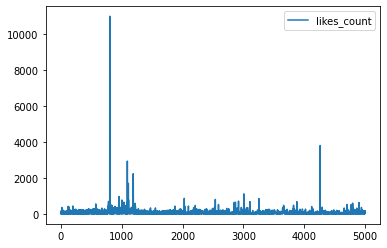

In [54]:
from matplotlib import pyplot
series = df_tweet[['date','likes_count']]
print(series.head())
series.plot()
pyplot.show()

In [ ]:
def count_plot_data(df, freq):
    plot_df = df.set_index('Timestamp').groupby('Subject').resample(freq).id.count().unstack(level=0, fill_value=0)
    plot_df.index.rename('Date', inplace=True)
    plot_df = plot_df.rename_axis(None, axis='columns')
    return plot_df